In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

df = pd.read_csv(r'c:\\Users\szere\OneDrive\Pulpit\Master topics\Startup-Success-Prediction-master\d3\data\startup.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1154 non-null   int64  
 1   state_code                1154 non-null   object 
 2   latitude                  1154 non-null   float64
 3   longitude                 1154 non-null   float64
 4   zip_code                  1154 non-null   object 
 5   id                        1154 non-null   object 
 6   city                      1154 non-null   object 
 7   Unnamed: 6                536 non-null    object 
 8   name                      1154 non-null   object 
 9   status                    1154 non-null   object 
 10  labels                    1154 non-null   int64  
 11  founded_at                1154 non-null   object 
 12  closed_at                 419 non-null    object 
 13  first_funding_at          1154 non-null   object 
 14  last_fun

In [4]:
# Data cleaning - unnecessary/incorrect data and nan values

#1) remove unnecessary columns + adding binary target column

df['success'] = df.status.apply(lambda x: 1 if x == "acquired" else 0)
df = df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 23, 29, 40 ]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    1154 non-null   float64
 1   age_last_funding_year     1154 non-null   float64
 2   age_first_milestone_year  959 non-null    float64
 3   age_last_milestone_year   959 non-null    float64
 4   relationships             1154 non-null   int64  
 5   funding_rounds            1154 non-null   int64  
 6   funding_total_usd         1154 non-null   int64  
 7   milestones                1154 non-null   int64  
 8   is_CA                     1154 non-null   int64  
 9   is_NY                     1154 non-null   int64  
 10  is_MA                     1154 non-null   int64  
 11  is_TX                     1154 non-null   int64  
 12  is_otherstate             1154 non-null   int64  
 13  is_software               1154 non-null   int64  
 14  is_web  

In [5]:
#2) drop rows with negative values

indexNames = df[ (df['age_first_funding_year'] < 0) ].index
df.drop(indexNames , inplace=True)

indexNames2 = df[ (df['age_last_funding_year'] < 0) ].index
df.drop(indexNames2 , inplace=True)

indexNames3 = df[ (df['age_first_milestone_year'] < 0) ].index
df.drop(indexNames3 , inplace=True)

indexNames4 = df[ (df['age_last_milestone_year'] < 0) ].index
df.drop(indexNames4 , inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1153
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    1044 non-null   float64
 1   age_last_funding_year     1044 non-null   float64
 2   age_first_milestone_year  863 non-null    float64
 3   age_last_milestone_year   863 non-null    float64
 4   relationships             1044 non-null   int64  
 5   funding_rounds            1044 non-null   int64  
 6   funding_total_usd         1044 non-null   int64  
 7   milestones                1044 non-null   int64  
 8   is_CA                     1044 non-null   int64  
 9   is_NY                     1044 non-null   int64  
 10  is_MA                     1044 non-null   int64  
 11  is_TX                     1044 non-null   int64  
 12  is_otherstate             1044 non-null   int64  
 13  is_software               1044 non-null   int64  
 14  is_web  

In [6]:
#3) replace nan with mean values

print(df.isnull().sum())

df['age_first_milestone_year'] = df['age_first_milestone_year'].replace(np.nan, 0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].replace(np.nan, 0)

print("Modified  Dataframe" , df, sep='\n')

age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    181
age_last_milestone_year     181
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top500                     0
success 

       age_first_funding_year  age_last_funding_year  \
count             1044.000000            1044.000000   
mean                 2.435398               4.119230   
std                  2.510954               2.944048   
min                  0.000000               0.000000   
25%                  0.668500               1.914375   
50%                  1.671200               3.710950   
75%                  3.713025               5.693150   
max                 21.895900              21.895900   

       age_first_milestone_year  age_last_milestone_year  relationships  \
count               1044.000000              1044.000000    1044.000000   
mean                   2.797452                 4.109578       7.583333   
std                    2.872823                 3.417387       7.022068   
min                    0.000000                 0.000000       0.000000   
25%                    0.268525                 1.000000       3.000000   
50%                    2.021950              

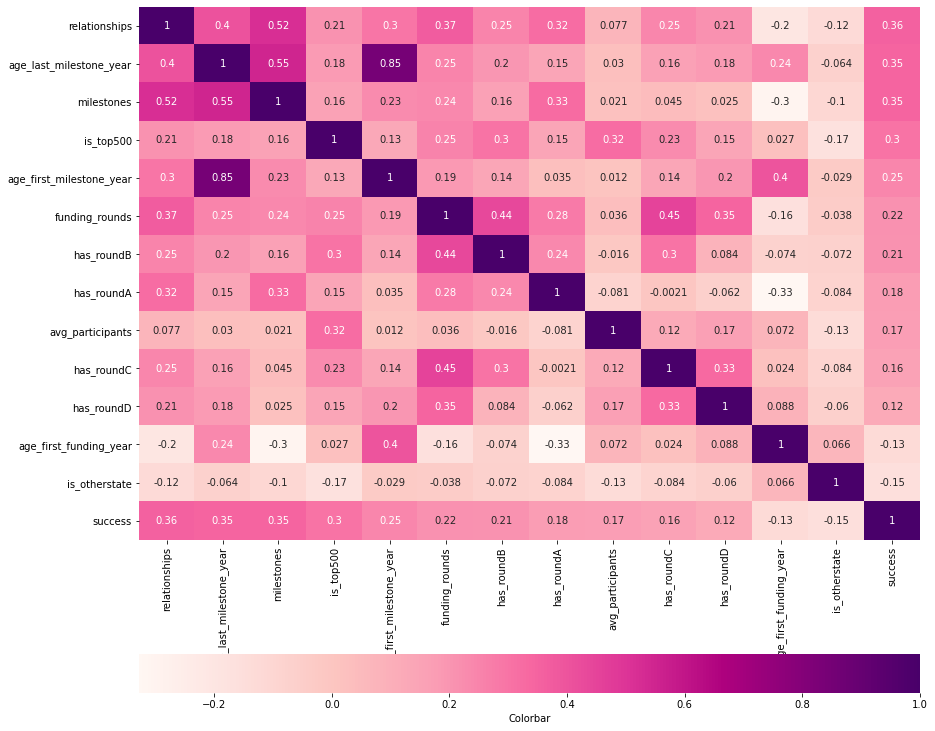

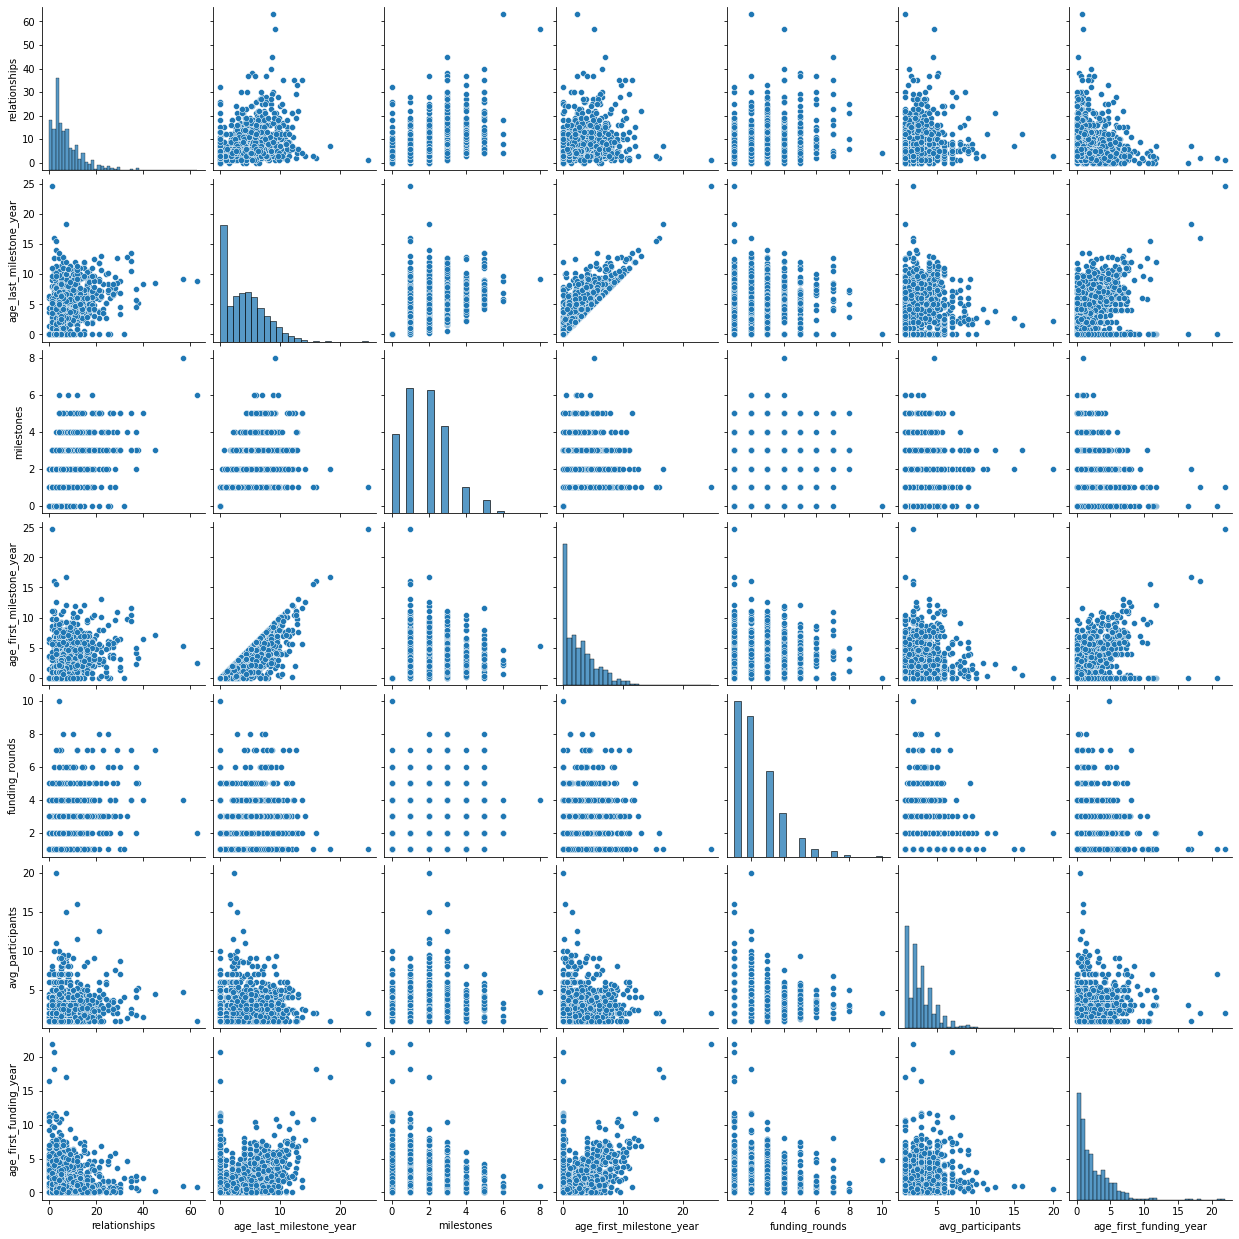

<ipython-input-7-e867938de1c6>:26: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  num_var.hist(ax=ax, bins=10, rwidth=0.85)


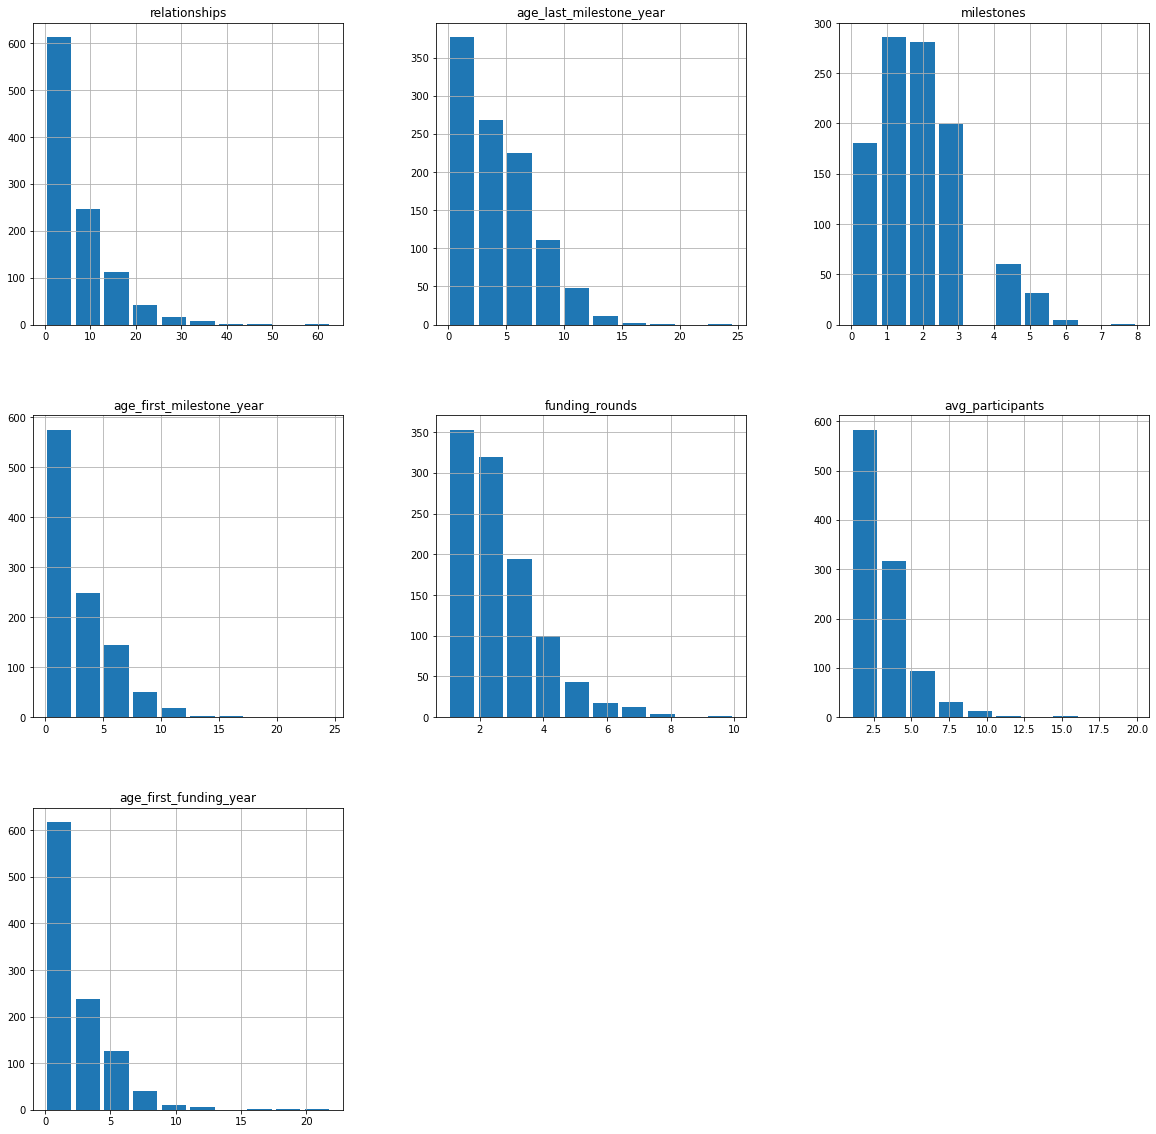

In [7]:
#Descriptive statistics and visualisations

pd.set_option("display.max.columns", None)
print (df. describe(include='all'))

#Find correlations between target and other variables

df_corr_pd = df.corr()
print(df_corr_pd['success'].sort_values(ascending=False))
corr_variables = df[['relationships', 'age_last_milestone_year', 'milestones', 'is_top500', 'age_first_milestone_year', 'funding_rounds', 'has_roundB', 'has_roundA',
                   'avg_participants', 'has_roundC', 'has_roundD', 'age_first_funding_year', 'is_otherstate', 'success']]

plt.figure(figsize = (14,14))
sn.heatmap(corr_variables.corr(), annot = True, cmap = plt.cm.RdPu, cbar_kws={'label': 'Colorbar', 'orientation': 'horizontal'})
plt.show()

#Numerical variables

num_var = df[['relationships', 'age_last_milestone_year', 'milestones', 'age_first_milestone_year', 'funding_rounds',
                   'avg_participants', 'age_first_funding_year']]
sn.pairplot(num_var)
plt.show()

fig = plt.figure(figsize = (20,20))
ax = fig.gca()
num_var.hist(ax=ax, bins=10, rwidth=0.85)
plt.show()

In [8]:
# Logistic Regression

%matplotlib inline

success_mod = logit("success ~ relationships + age_last_milestone_year + milestones + is_top500 + age_first_milestone_year + funding_rounds + has_roundB + has_roundA"
                   "+ avg_participants + has_roundC + has_roundD + age_first_funding_year + is_otherstate", df ).fit()

print(success_mod.summary())

#How good is the prediction?
success_mod.pred_table()

#Marginal effect
mfx = success_mod.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.484320
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                success   No. Observations:                 1044
Model:                          Logit   Df Residuals:                     1044
Method:                           MLE   Df Model:                           -1
Date:                Wed, 03 Feb 2021   Pseudo R-squ.:                  0.2460
Time:                        18:51:29   Log-Likelihood:                -505.63
converged:                       True   LL-Null:                       -670.59
Covariance Type:            nonrobust   LLR p-value:                       nan
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.7067      0.284     -6.006      0.000      -2.264

c:\users\szere\pycharmprojects\pythonproject2\venv\lib\site-packages\statsmodels\tools\tools.py:689: RuntimeWarning: invalid value encountered in greater
  return int((abs_diag > tol).sum())


In [9]:
#Divide df into train (67%)  and test (33%) subsets

X = df [['relationships', 'age_last_milestone_year', 'milestones', 'is_top500', 'age_first_milestone_year', 'funding_rounds', 'has_roundB', 'has_roundA',
                   'avg_participants', 'has_roundC', 'has_roundD', 'age_first_funding_year', 'is_otherstate']]
y= df[['success']]
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1044, 13) (1044, 1)
(699, 13) (345, 13) (699, 1) (345, 1)


In [14]:
#CART algorithm

dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7739130434782608


In [ ]:
#ROC

y_score = dtc.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score))

# Plot ROC
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()